In [144]:
import shap
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [145]:
df=pd.read_csv(r"C:\Users\mail2\Desktop\ml\archive (3)\Cancer_Data.csv")
del df[df.columns[-1]]
df2=df.copy()
del df2['diagnosis']
y,x=df[df.columns[1]],df2

In [146]:
y.replace('B',0,inplace=True)
y.replace('M',1,inplace=True)
y=y.astype(int)
y
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)


In [147]:
model = RandomForestRegressor()
model.fit(X_train, y_train)

RandomForestRegressor()

In [148]:
# Fits the explainer
explainer = shap.Explainer(model.predict, X_test)
# Calculates the SHAP values - It takes some time
shap_values = explainer(X_test)

Permutation explainer: 115it [00:17,  2.81it/s]                         


In [149]:
pred= model.predict(X_test)
result = np.where(pred<0.5, 0,1)

In [150]:
import numpy as np

<AxesSubplot: >

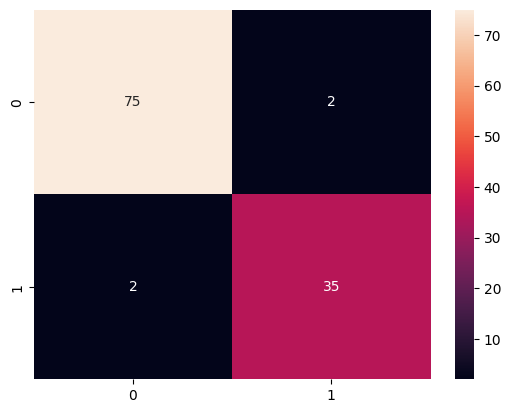

In [151]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
pred= model.predict(X_test)
cf_mat= confusion_matrix(np.array( y_test),result)
sns.heatmap(cf_mat, annot=True)

In [152]:
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


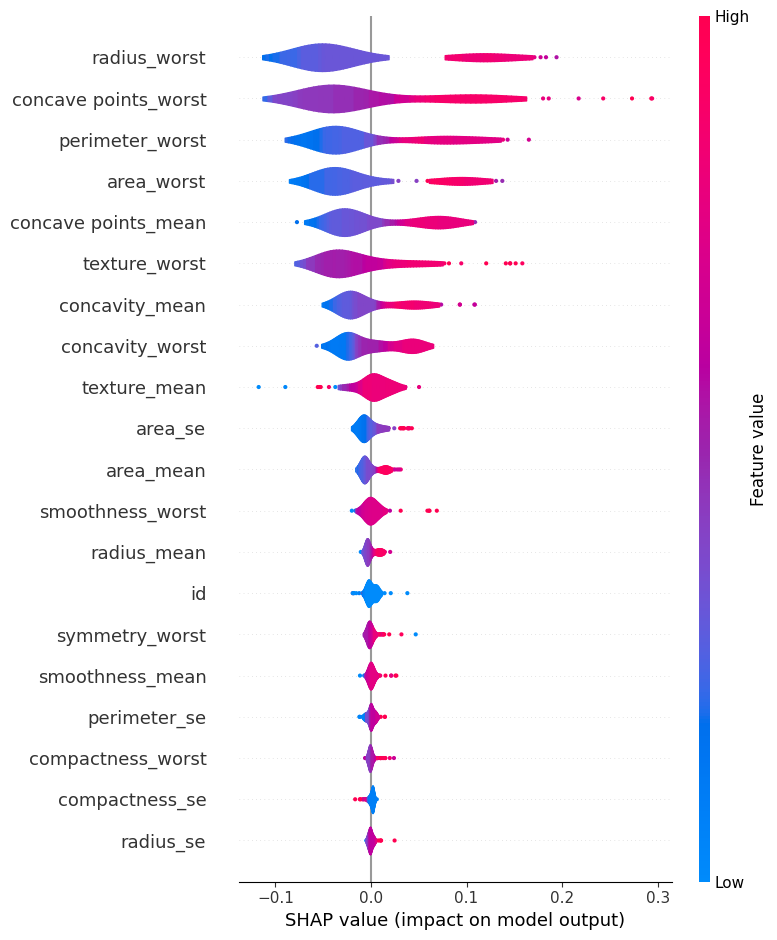

In [153]:
shap.summary_plot(shap_values, plot_type='violin')

In [154]:
n=0
for i in model.feature_importances_:
    print(f'{df.columns[n]}\t:{i}')
    n+=1

id	:0.005470102993299222
diagnosis	:0.0021714506175912686
radius_mean	:0.024073429102443904
texture_mean	:0.0011068480340723867
perimeter_mean	:0.003998071247080442
area_mean	:0.0032263340067116655
smoothness_mean	:0.0009153742621015975
compactness_mean	:0.0076835165164443825
concavity_mean	:0.07474223940470281
concave points_mean	:0.00027043875784532254
symmetry_mean	:0.0018695965467785771
fractal_dimension_mean	:0.0025101787888610876
radius_se	:0.0032694906781316336
texture_se	:0.0028841690658531773
perimeter_se	:0.0070721650529338665
area_se	:0.0015188747019451753
smoothness_se	:0.0021489960579032636
compactness_se	:0.002490461955678671
concavity_se	:0.003035514734483968
concave points_se	:0.0030274513424724593
symmetry_se	:0.001740441587231645
fractal_dimension_se	:0.1668719348686818
radius_worst	:0.02469480321586149
texture_worst	:0.3820681715303027
perimeter_worst	:0.070533936608038
area_worst	:0.010978769291342453
smoothness_worst	:0.002958687977005211
compactness_worst	:0.01666

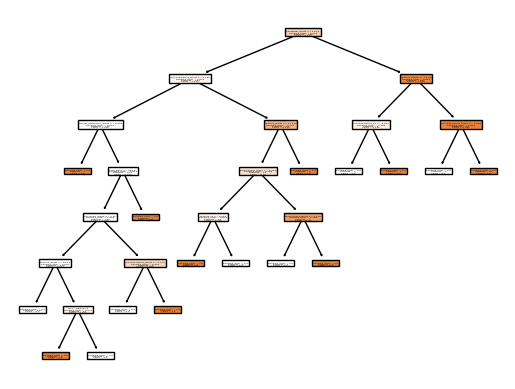

In [155]:
from sklearn.tree import plot_tree
plot_tree(model.estimators_[5], feature_names = x.columns,class_names=['Disease', "No Disease"],filled=True);

In [156]:
len(df.columns)

32

In [157]:
from xgboost import XGBClassifier

In [158]:
from sklearn.feature_selection import RFE

rfe = RFE(XGBClassifier(n_jobs=-1, random_state=1))

rfe.fit(X_train, y_train)


RFE(estimator=XGBClassifier(base_score=None, booster=None, callbacks=None,
                            colsample_bylevel=None, colsample_bynode=None,
                            colsample_bytree=None, early_stopping_rounds=None,
                            enable_categorical=False, eval_metric=None,
                            feature_types=None, gamma=None, gpu_id=None,
                            grow_policy=None, importance_type=None,
                            interaction_constraints=None, learning_rate=None,
                            max_bin=None, max_cat_threshold=None,
                            max_cat_to_onehot=None, max_delta_step=None,
                            max_depth=None, max_leaves=None,
                            min_child_weight=None, missing=nan,
                            monotone_constraints=None, n_estimators=100,
                            n_jobs=-1, num_parallel_tree=None, predictor=None,
                            random_state=1, ...))

In [159]:
pred= rfe.predict(X_test)
result = np.where(pred<0.5, 0,1)

In [160]:
# Fits the explainer
explainer = shap.Explainer(rfe.predict, X_test)
# Calculates the SHAP values - It takes some time
shap_values = explainer(X_test)

<AxesSubplot: >

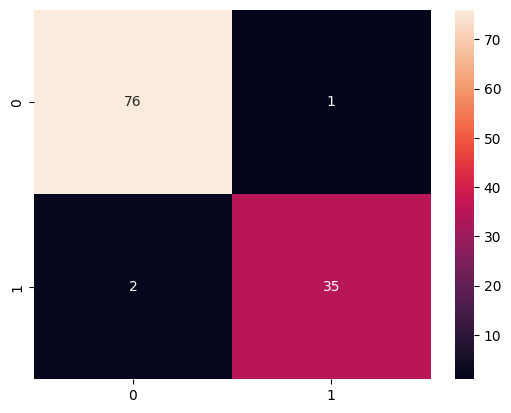

In [161]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
pred= rfe.predict(X_test)
cf_mat= confusion_matrix(np.array( y_test),result)
sns.heatmap(cf_mat, annot=True)

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


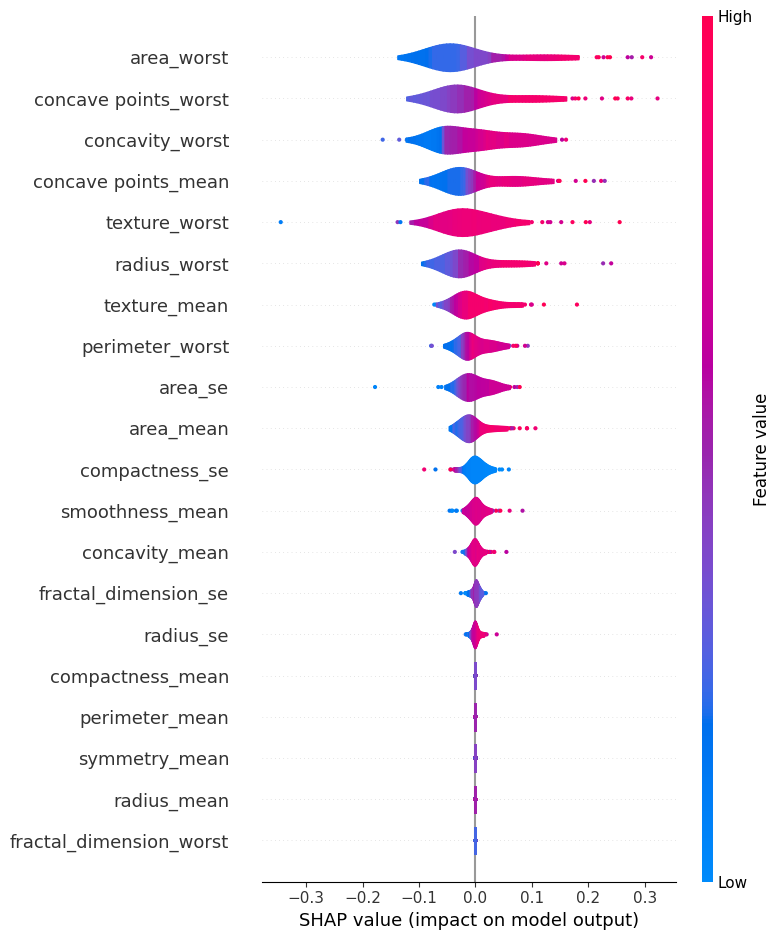

In [162]:
shap.summary_plot(shap_values,plot_type='violin')

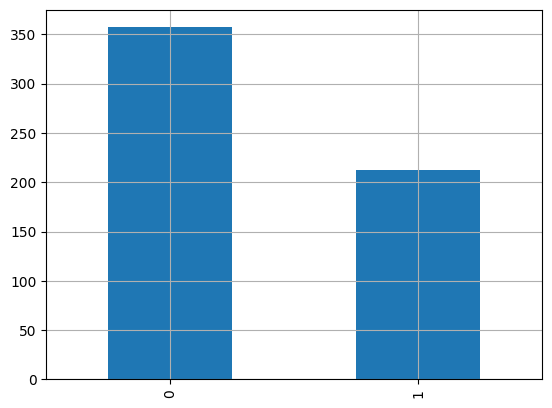

In [163]:
df['diagnosis'].value_counts().plot(kind='bar').grid(True)

In [164]:
from imblearn.over_sampling import SMOTE

The parameter `n_jobs` has been deprecated in 0.10 and will be removed in 0.12. You can pass an nearest neighbors estimator where `n_jobs` is already set instead.


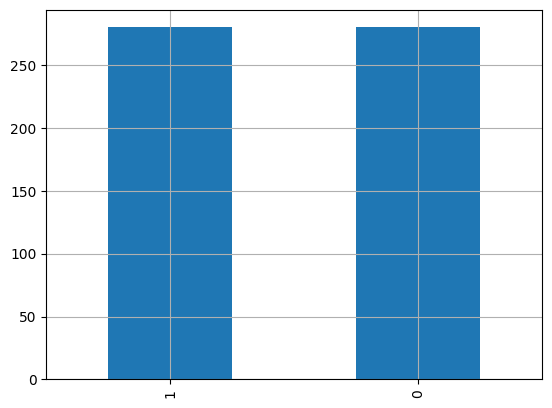

In [165]:
from imblearn.over_sampling import  SMOTE

smote = SMOTE(n_jobs=-1)
X_sm, y_sm = smote.fit_resample(X_train, y_train)
y_sm.value_counts().plot(kind='bar').grid(True)